In [1]:
import control as ct
import numpy as np
import display_utils as dp
import matplotlib.pyplot as plt
from scipy.linalg import expm

In [2]:
A = np.array([[0, 1, 0], [0, 0, 1], [-4, -1, -6]])
B = np.array([[0], [0], [1]])
C = np.array([[1, 0, 0]])
D = np.array([[0]])

ss = ct.ss(A, B, C, D)
dp.ss(ss)

### State-Space System

**System dimensions:** 3 states, 1 input(s), 1 output(s)

**State-space equations:**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**System matrices:**

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [3]:
# a
tf = ct.tf(ss)
dp.tf(tf)

### Transfer Function

<IPython.core.display.Math object>

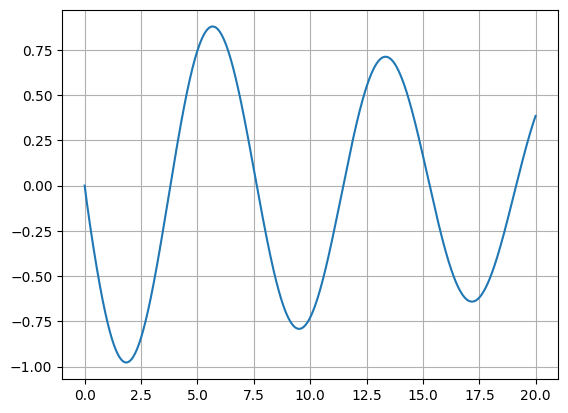

In [4]:
# b
t = np.arange(0, 20, 0.01)
x0 = np.array([0, -1, 1])

T, y_out, x_out = ct.initial_response(ss, T=t, X0=x0, transpose=True, return_x=True)
plt.figure()
plt.plot(T, y_out.T)
plt.grid()
plt.show()

In [5]:
# c
# Compute state transition matrix at t=20
t_final = 20
Phi_t = expm(A * t_final)

# Compute state at t=20 using state transition matrix
x_20 = Phi_t @ x0

print(f"State at t=20 using state transition matrix:")
print(f"x(20) = {x_20}")

# Get the state at t=20 (last time point)
x_20_sim = x_out[:, -1]

print(f"\nState at t=20 from simulation in part (b):")
print(f"x(20) = {x_20_sim}")

# Output at t=20
y_20_transition = C @ x_20
y_20_sim = y_out[-1]

print(f"\nOutput at t=20 using state transition matrix:")
print(f"y(20) = {y_20_transition[0]:.6f}")
print(f"\nOutput at t=20 from simulation in part (b):")
print(f"y(20) = {y_20_sim:.6f}")

print(f"\nDifference in output: {abs(y_20_transition[0] - y_20_sim):.10f}")

State at t=20 using state transition matrix:
x(20) = [ 0.38860813  0.35706097 -0.28111998]

State at t=20 from simulation in part (b):
x(20) = [ 1.          0.95161765  0.90634494 ... -0.27428672 -0.27658439
 -0.27886219]

Output at t=20 using state transition matrix:
y(20) = 0.388608

Output at t=20 from simulation in part (b):
y(20) = 0.385024

Difference in output: 0.0035846282
